In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


def tohum(seed):    
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    
tohum(2002)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Since our data is already separated into test and train, we were able to separate them directly without any extra processing. “test” and ‘train’ without any extra processing.

In [ ]:
image_shape = x_train[0].shape
pixel_count = np.prod(image_shape)
print(f"Number of pixels of the image: {pixel_count}")

Görüntünün piksel sayısı: 784


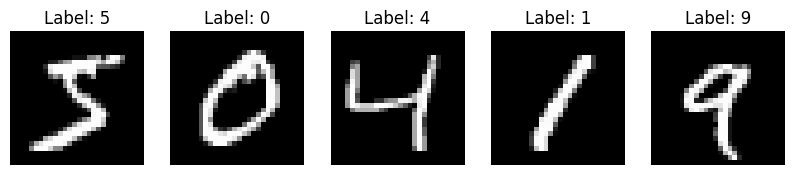

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()

When we obtained the number of pixels of the image, we determined what the nxn value was, in this case, the images we worked with were calculated as 28x28. Accordingly, the Flatten value will be calculated.

In [5]:
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))
x_train_normalized = normalize(x_train_flat, norm='l2').reshape((x_train.shape[0], 28, 28, 1))
x_test_normalized = normalize(x_test_flat, norm='l2').reshape((x_test.shape[0], 28, 28, 1))


y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

We pre-processed the images to make them suitable for training the neural network.

### Model

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), kernel_initializer='he_normal', padding='same'),
    MaxPool2D(pool_size=(2,2), padding='same'),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), padding='same'),
    Dropout(0.40),
    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), padding='same'),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-03 21:50:33.019807: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-03 21:50:33.019840: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-03 21:50:33.019849: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-03 21:50:33.019865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-03 21:50:33.019879: I tensorflow/core/common_runtime/pluggable_device/pl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,786 (2.36 MB)

 Trainable params: 619,786 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train_normalized, y_train_categorical, epochs=10,
                     batch_size=32, validation_data=(x_test_normalized, y_test_categorical))

Epoch 1/10


2024-11-03 21:50:34.576521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8462 - loss: 0.4615 - val_accuracy: 0.9824 - val_loss: 0.0526
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9700 - loss: 0.0962 - val_accuracy: 0.9889 - val_loss: 0.0350
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9786 - loss: 0.0694 - val_accuracy: 0.9913 - val_loss: 0.0263
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9814 - loss: 0.0593 - val_accuracy: 0.9913 - val_loss: 0.0271
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9832 - loss: 0.0531 - val_accuracy: 0.9925 - val_loss: 0.0228
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9847 - loss: 0.0513 - val_accuracy: 0.9921 - val_loss: 0.0244
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9857 - loss: 0.0465 - val_accuracy: 0.9926 - val_loss: 0.0223
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9865 - loss: 0.04

In [8]:
print("Best Training Accuracy:", max(history.history['accuracy']))
print("Best Validation Accuracy:", max(history.history['val_accuracy']))

Best Training Accuracy: 0.9883833527565002
Best Validation Accuracy: 0.9932000041007996


In the data we trained, it gave a correct result close to 98%. In our validation accuracy value, it gave a better result than the one we trained with 99%, which means that our model did not memorize (overfitting).

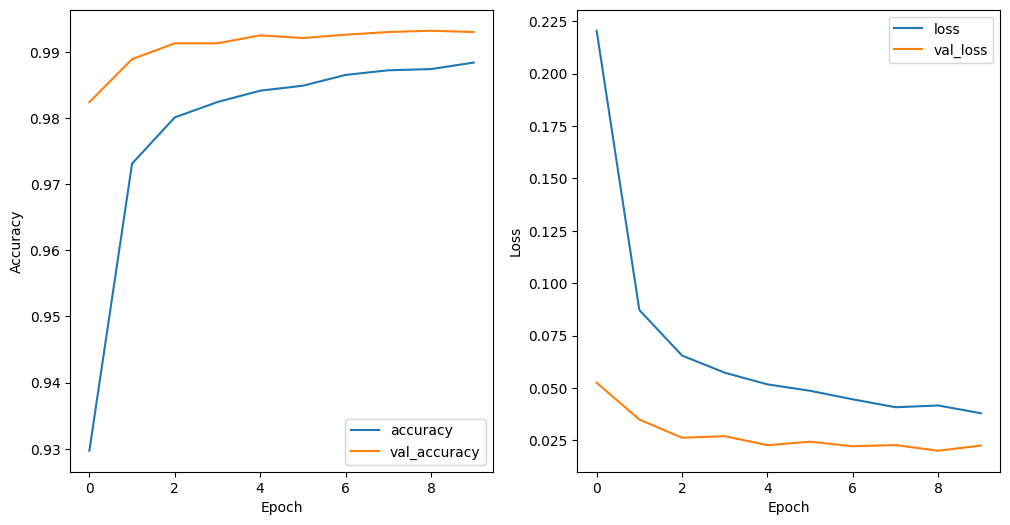

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

For Accuracy values, the distance seems to have widened. However, our overall Accuracy has increased and the fracture relationships in the data are directly proportional to each other. 

In [10]:
y_pred = np.argmax(model.predict(x_test_normalized), axis=1)
y_test_single = np.argmax(y_test_categorical, axis=1)
print(classification_report(y_test_single, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Our Accuracy value shows a success of 99%. This is an indication that our model gives a very good result. Finally, let's examine the Confusion matrix values and observe how many of our values are correctly predicted.

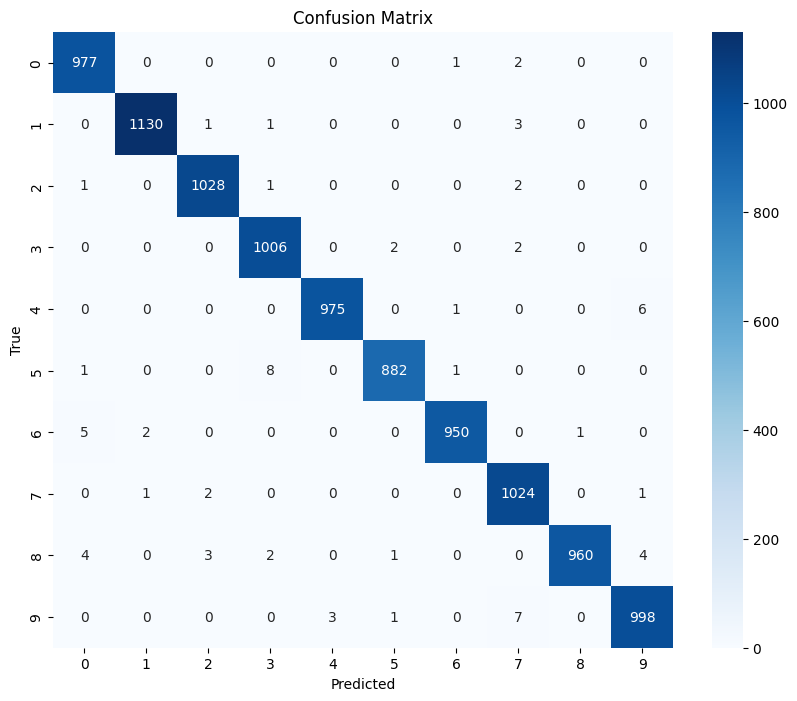

In [11]:
cm = confusion_matrix(y_test_single, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

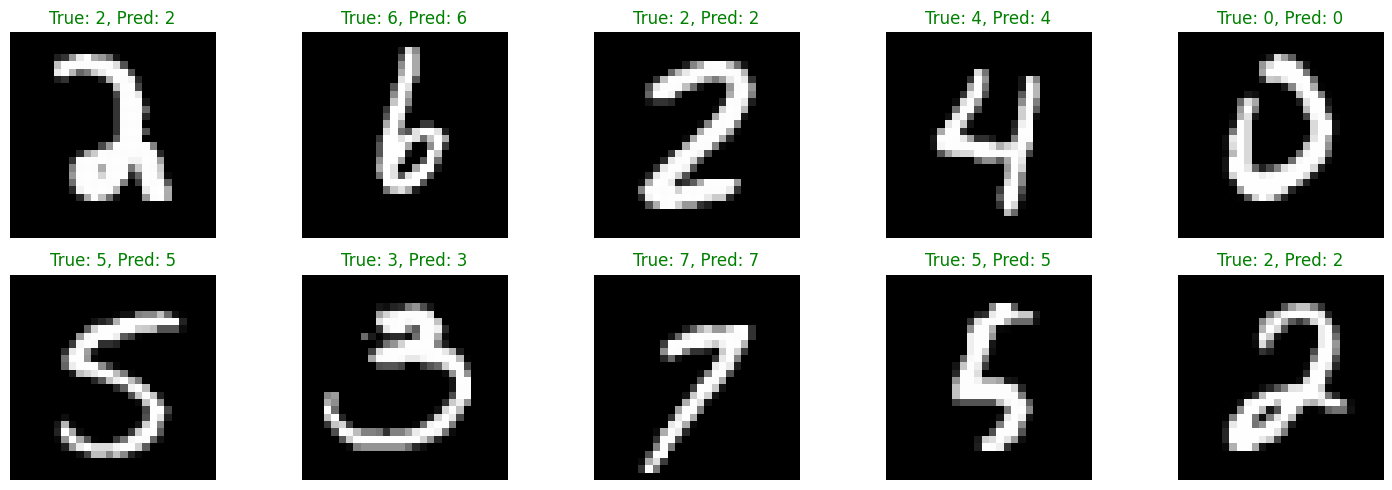

In [12]:
num_images = 10
indices = random.sample(range(x_test_normalized.shape[0]), num_images)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    image = x_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()